In [1]:
import pandas as pd  # untuk analisa dataframe
import numpy as np # untuk perhitungan statistik
import matplotlib.pyplot as plt # untuk visualisasi
import seaborn as sns # untuk visualisasi
import missingno as msno  # untuk visualisasi missing valeu
from sklearn.preprocessing import LabelEncoder ## Untuk Tranformasi Data

import warnings
warnings.simplefilter(action='ignore')

In [2]:
#load data
df = pd.read_excel('ECommerceDataset.xlsx' , sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
#mencari presentase customer churn
jumlah_churn = df['Churn'].value_counts()

# Menampilkan hasil
print(jumlah_churn)

Churn
0    4682
1     948
Name: count, dtype: int64


In [4]:
# menampilkan presentase customer churn
a = (948/5630)* 100

print(a, "%")

16.838365896980463 %


In [5]:
#mengecek missing value
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

<Axes: >

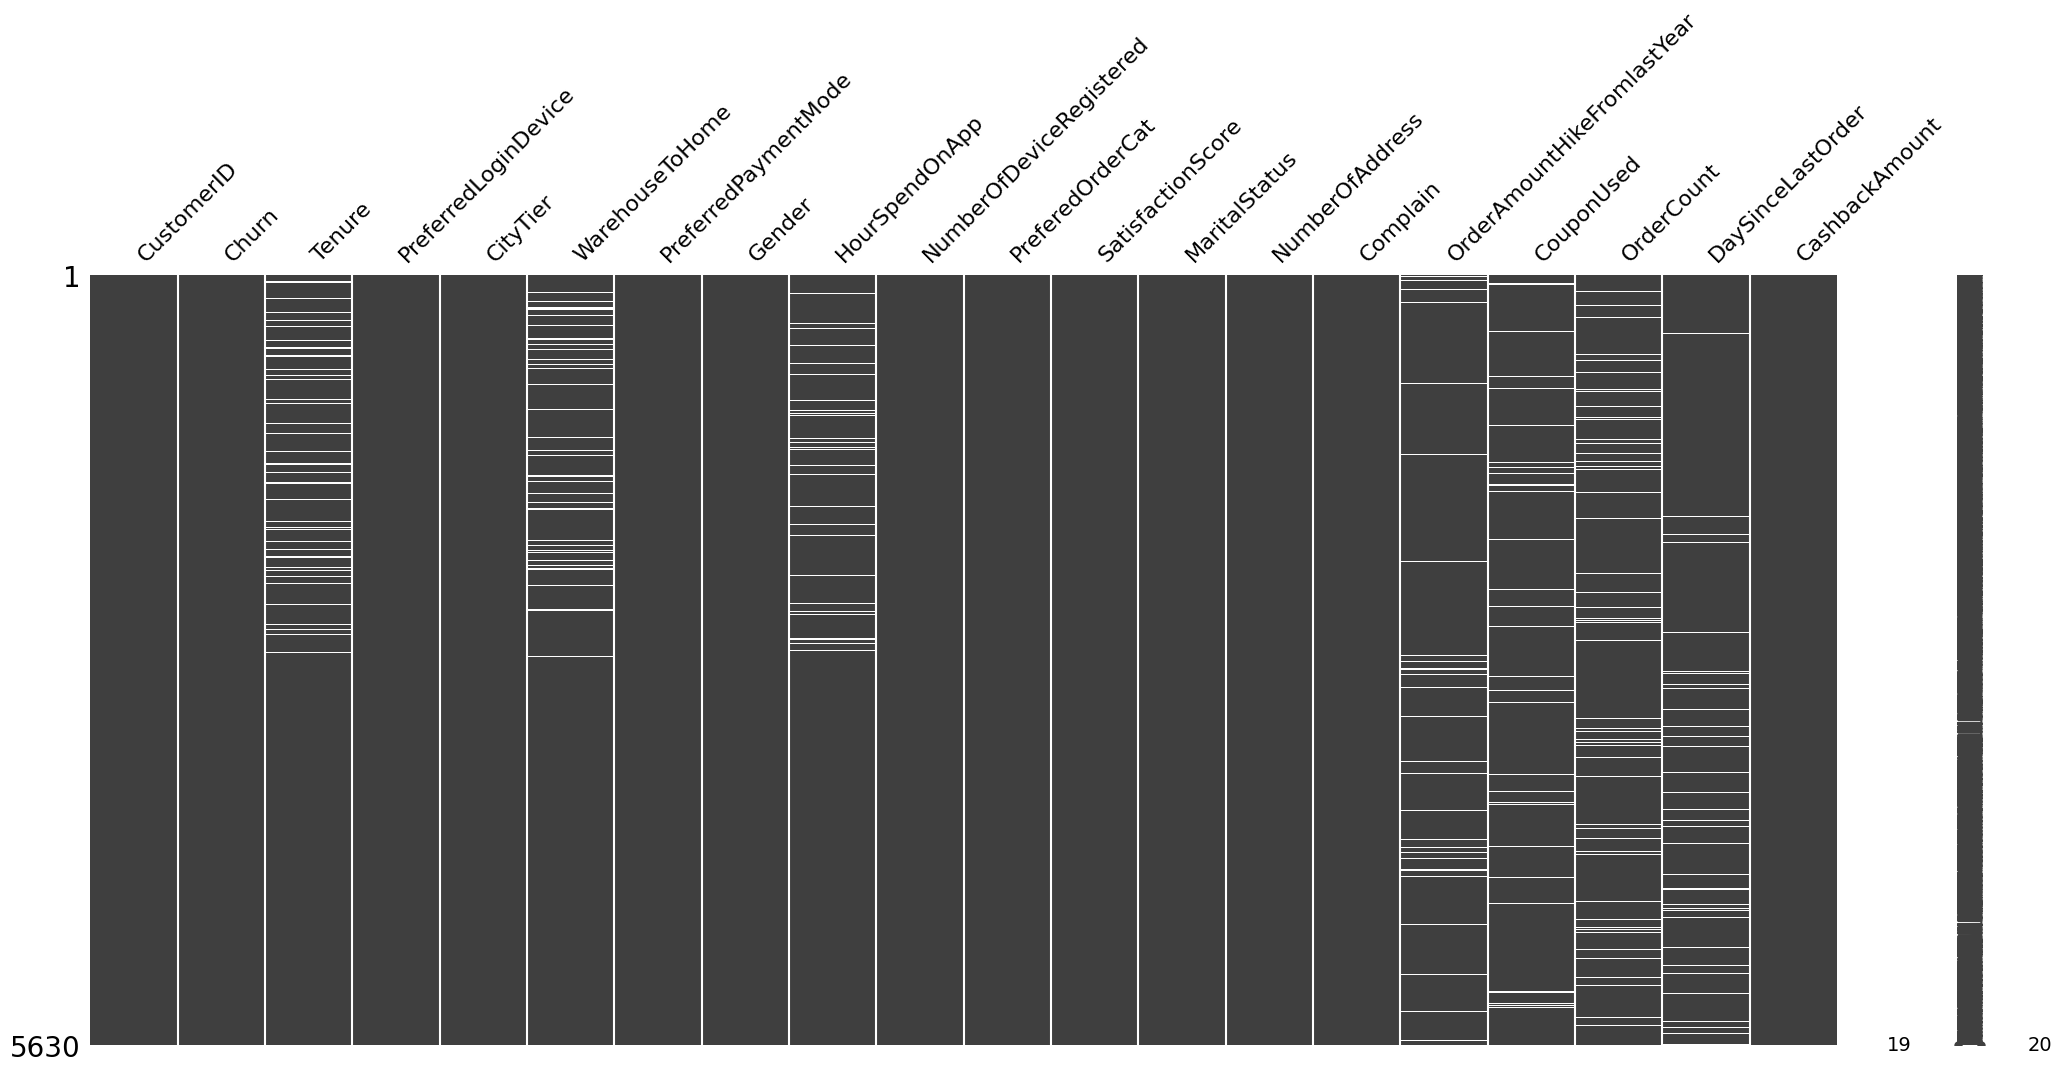

In [6]:
#visualiasi missing value 
import missingno as msno
msno.matrix(df)

In [7]:
# Menghitung jumlah missing value pada tiap kolom
missing_value = df.isna().sum() / len(df) * 100 
missing_value.sort_values(ascending = False)


DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.689165
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
WarehouseToHome                4.458259
CustomerID                     0.000000
MaritalStatus                  0.000000
Complain                       0.000000
NumberOfAddress                0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
Churn                          0.000000
NumberOfDeviceRegistered       0.000000
Gender                         0.000000
PreferredPaymentMode           0.000000
CityTier                       0.000000
PreferredLoginDevice           0.000000
CashbackAmount                 0.000000
dtype: float64

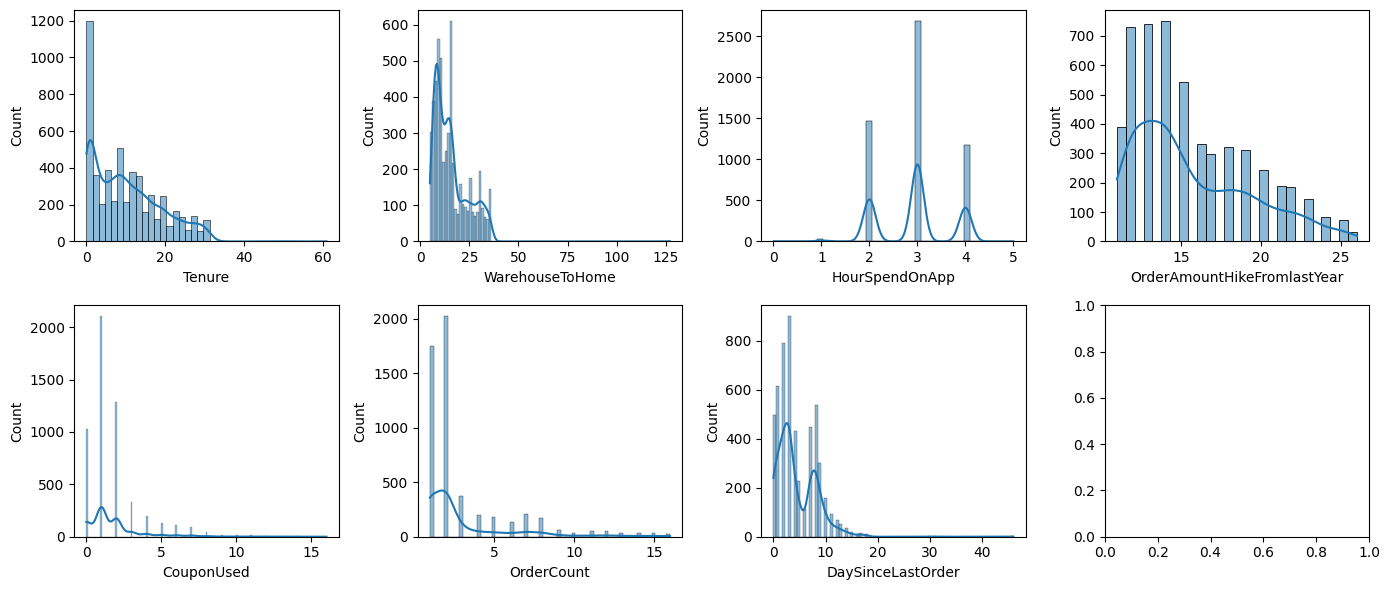

In [8]:
#mengecek distribusi kolom
distribusi_kolom = ["Tenure", "WarehouseToHome", "HourSpendOnApp",
                    "OrderAmountHikeFromlastYear", "CouponUsed",
                    "OrderCount", "DaySinceLastOrder"]


fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 6))


# Perulangan untuk membuat boxplot untuk kolom numerik
for i, col in enumerate(distribusi_kolom):


    # Menghitung nomor baris untuk subplot berdasarkan indeks iterasi i
    duplicate_rows_subplot = i // 4


    # Menghitung nomor kolom untuk subplot berdasarkan indeks iterasi i
    columns_subplot = i % 4


    # Membuat histogram
    sns.histplot(data=df, x=col, kde=True, ax=ax[duplicate_rows_subplot, columns_subplot])


plt.tight_layout()
plt.show()


In [9]:
# Mennghapus kolom coupon used, order count dan hour spend on app. Karena missing value teralu jauh rentangnya
df.drop("CouponUsed" , axis = 1 , inplace = True)
df.drop("OrderCount", axis = 1 , inplace = True)
df.drop("HourSpendOnApp" , axis = 1 , inplace = True)

In [10]:
# Mengisi missing value dengan modus
tenure_mode = df["Tenure"].mode()[0]
df["Tenure"] = df["Tenure"].fillna(tenure_mode)

warehouseToHome_mode = df["WarehouseToHome"].mode()[0]
df["WarehouseToHome"] = df["WarehouseToHome"].fillna(warehouseToHome_mode)

daySinceLastOrder_mode = df["DaySinceLastOrder"].mode()[0]
df["DaySinceLastOrder"] = df["DaySinceLastOrder"].fillna(daySinceLastOrder_mode)

orderAmountHikeFromlastYear_mode = df["OrderAmountHikeFromlastYear"].mode()[0]
df["OrderAmountHikeFromlastYear"] = df["OrderAmountHikeFromlastYear"].fillna(orderAmountHikeFromlastYear_mode)


In [11]:
df.isna().sum()


CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [12]:
#mengecek data duplikat
df.duplicated().sum()

0

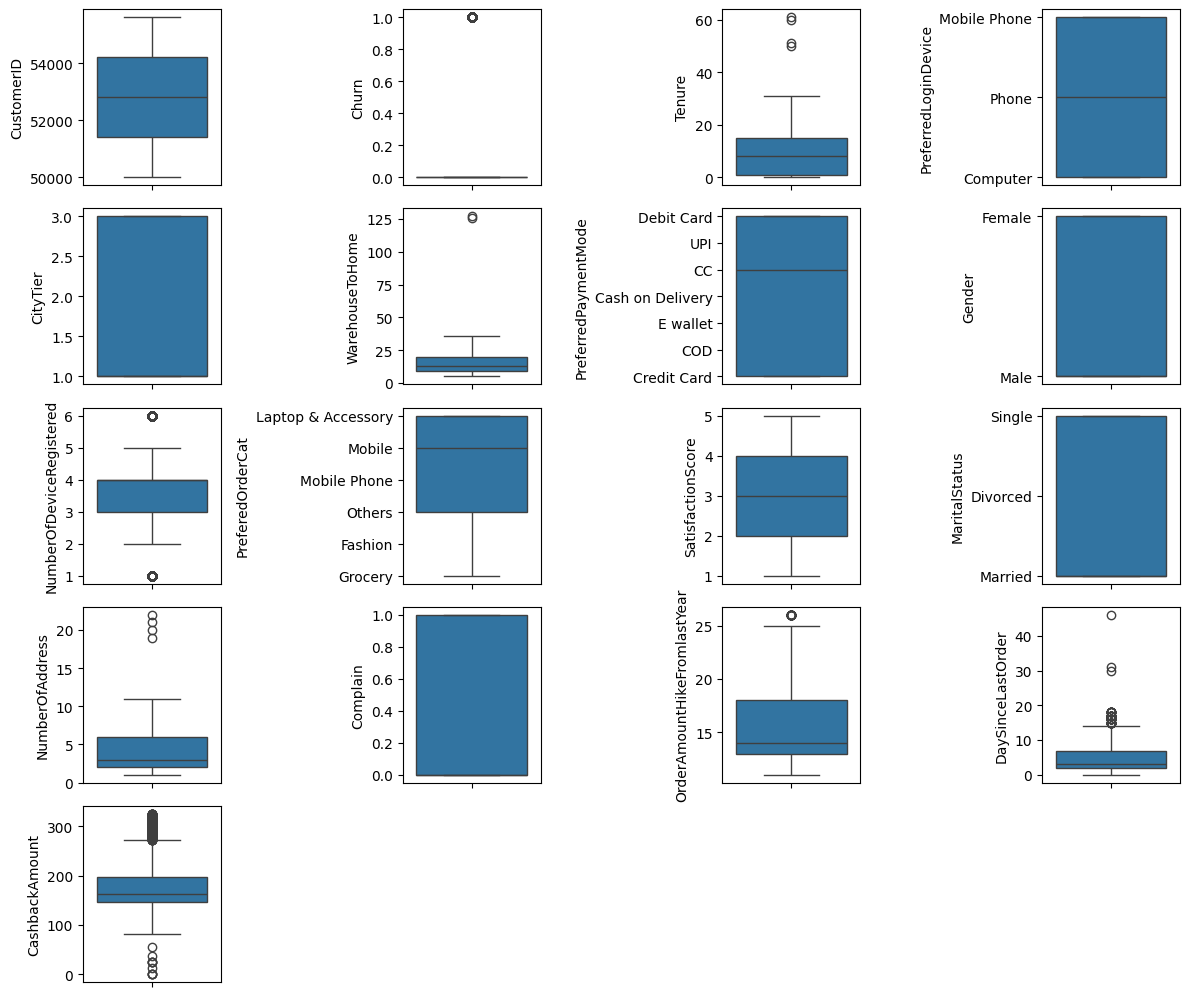

In [13]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [14]:
#Mengatasi Outliers
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Mendefinisikan Batas Atas dah Batas Bawah
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # Membuat filter Outliers
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [15]:
# Melakukan handling pada kolom yang memiliki outliers 
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3,Laptop & Accessory,2,Single,9,1,11.0,5.0,159.93
1,50002,1,1.0,Phone,1,8.0,UPI,Male,4,Mobile,3,Single,7,1,15.0,0.0,120.90
2,50003,1,1.0,Phone,1,30.0,Debit Card,Male,4,Mobile,3,Single,6,1,14.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,4,Laptop & Accessory,5,Single,8,0,23.0,3.0,134.07


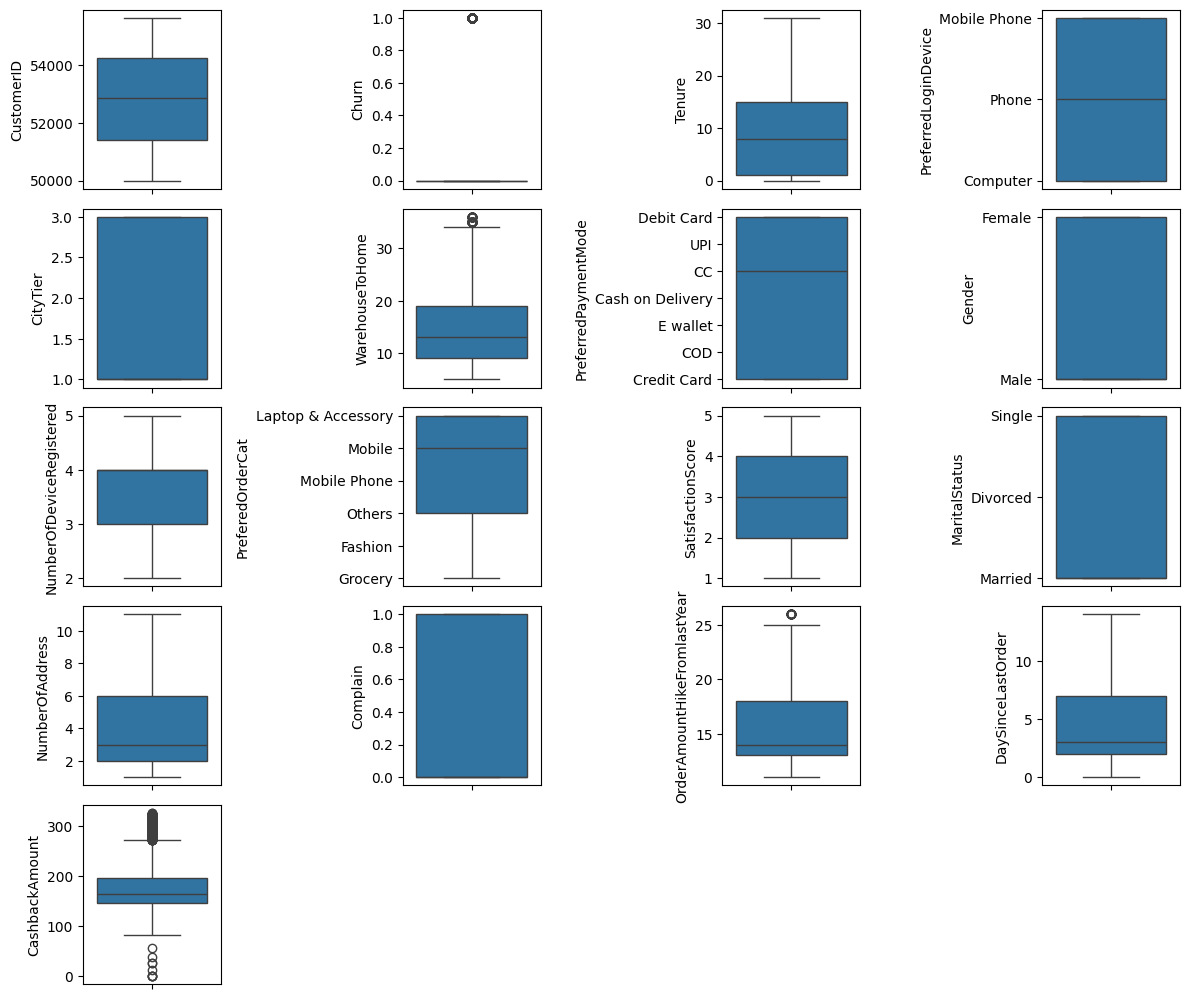

In [16]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [17]:
# menangani inkonsistensi data kolom PreferredLoginDevice
df["PreferredLoginDevice"].unique()
df["PreferredLoginDevice"].value_counts()


PreferredLoginDevice
Mobile Phone    2540
Computer        1503
Phone           1120
Name: count, dtype: int64

In [18]:
# mapping inkonsisten ke format yang benar
map_inkonsistent_PreferredLoginDevice = {
    "Mobile Phone" : "Phone"
}
df["PreferredLoginDevice"].replace(map_inkonsistent_PreferredLoginDevice, inplace=True)

In [19]:
# menangani inkonsistensi data kolom PreferredPaymentMode
df["PreferredPaymentMode"].unique()
df["PreferredPaymentMode"].value_counts()


PreferredPaymentMode
Debit Card          2103
Credit Card         1383
E wallet             575
UPI                  379
COD                  340
CC                   248
Cash on Delivery     135
Name: count, dtype: int64

In [20]:
# mapping inkonsisten ke format yang benar
map_inkonsistent_PreferredPaymentMode = {
    "Cash on Delivery" : "COD",
    "CC": "Credit Card"
}
df["PreferredPaymentMode"].replace(map_inkonsistent_PreferredPaymentMode, inplace=True)

In [21]:
# menangani inkonsistensi data kolom PreferedOrderCat
df["PreferedOrderCat"].unique()
df["PreferedOrderCat"].value_counts()


PreferedOrderCat
Laptop & Accessory    1883
Mobile Phone          1183
Fashion                777
Mobile                 727
Grocery                358
Others                 235
Name: count, dtype: int64

In [22]:
# mapping inkonsisten ke format yang benar
map_inkonsistent_PreferedOrderCat = {
    "Mobile" : "Mobile Phone"
}
df["PreferedOrderCat"].replace(map_inkonsistent_PreferedOrderCat, inplace=True)

In [23]:
df.drop('CustomerID' , axis = 1 , inplace = True)

In [24]:
# convert num_cols to categories
df2 = df.copy()
for col in df2.columns:
  if col == 'CustomerID':
    continue

  else:
    if df2[col].dtype == 'int':
      df2[col] = df[col].astype(str)

df2.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [25]:
# cat columns
data = df[df.select_dtypes(exclude=np.number).columns]
data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile Phone,Single
2,Phone,Debit Card,Male,Mobile Phone,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,Credit Card,Male,Mobile Phone,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Phone,Credit Card,Male,Fashion,Married
5627,Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [26]:
#mengubah nilai di kolom churn 0 menjadi no chun dan 1 menjadi churn
df['Churn'].replace({0: 'no churn', 1: 'churn'}, inplace=True)
# Mengganti nilai 0 dan 1 menjadi 'no Complain' dan 'Complain' di kolom 'Complain'
df['Complain'].replace({0: 'no Complain', 1: 'Complain'}, inplace=True)


In [27]:
# # #save data yang sudah bersih 
# df.to_excel('Fix_Clean_Ecommerrce_Dataset.xlsx', index=False)

In [28]:
le = LabelEncoder()

In [29]:
# Encode for cat_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,DaySinceLastOrder,CashbackAmount
0,0,4.0,1,3,6.0,2,0,3,2,2,2,9,0,11.0,5.0,159.93
1,0,1.0,1,1,8.0,4,1,4,3,3,2,7,0,15.0,0.0,120.90
2,0,1.0,1,1,30.0,2,1,4,3,3,2,6,0,14.0,3.0,120.28
3,0,0.0,1,3,15.0,2,1,4,2,5,2,8,1,23.0,3.0,134.07


In [30]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(4)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,1,2,0,2,2
1,1,4,1,3,2
2,1,2,1,3,2
3,1,2,1,2,2


<Axes: >

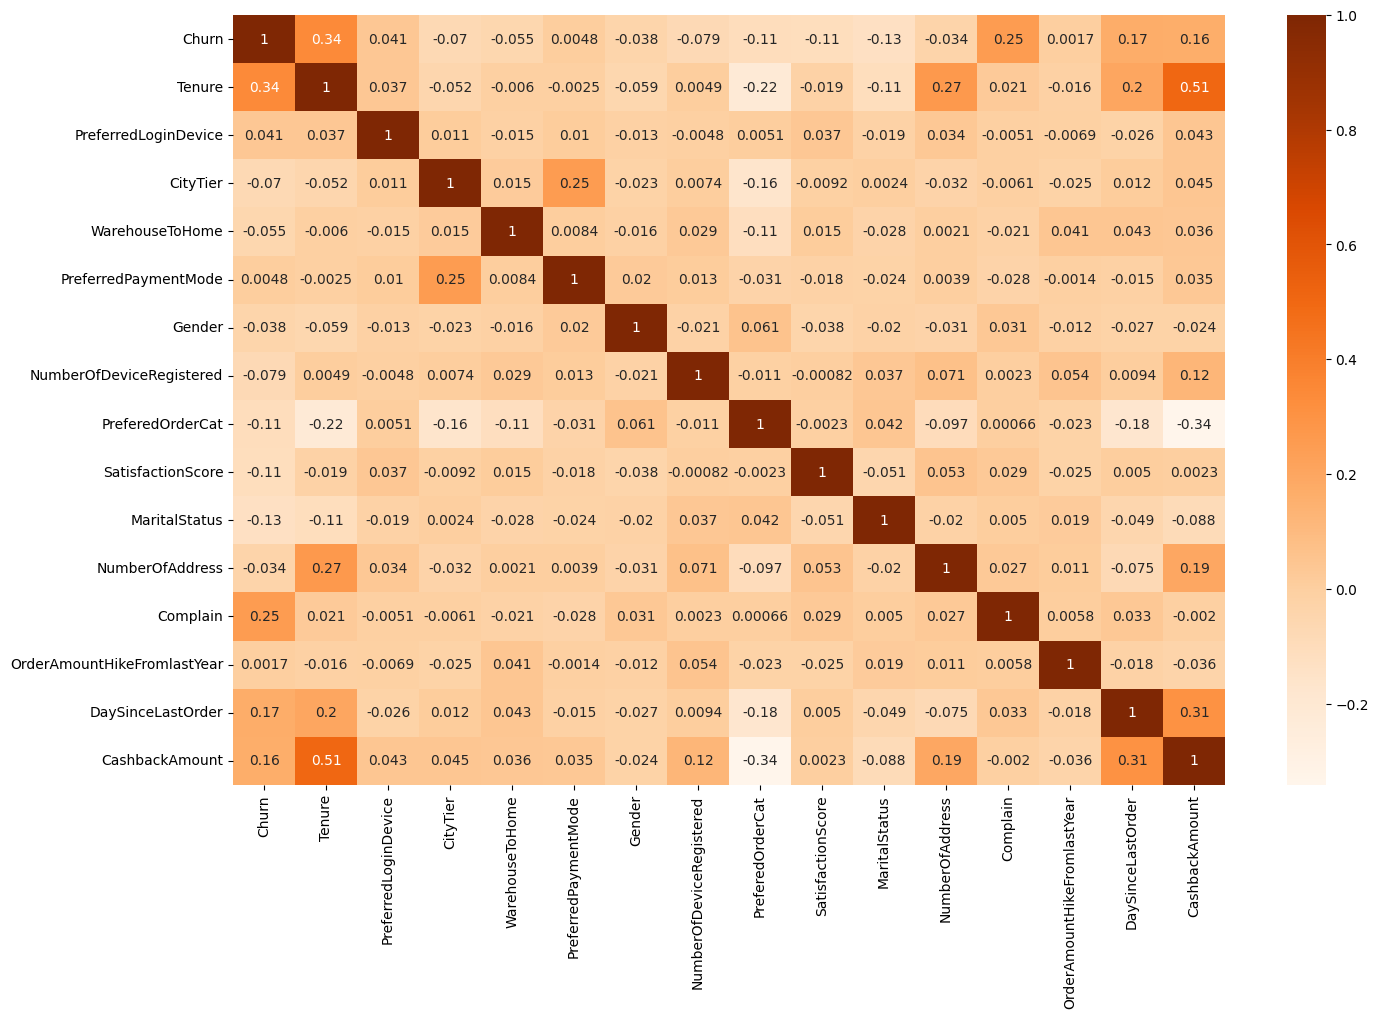

In [31]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr() , annot = True , cmap = 'Oranges')

In [32]:
corr_matrix = df.corr()
corr_matrix

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,DaySinceLastOrder,CashbackAmount
Churn,1.000000,0.344622,0.040878,-0.069855,-0.054705,0.004805,-0.038293,-0.079053,-0.105381,-0.108447,-0.131682,-0.033873,0.252180,0.001734,0.170006,0.164792
Tenure,0.344622,1.000000,0.036545,-0.052461,-0.005985,-0.002495,-0.058550,0.004902,-0.217001,-0.018504,-0.110191,0.267211,0.021073,-0.015740,0.198451,0.506997
PreferredLoginDevice,0.040878,0.036545,1.000000,0.010863,-0.015268,0.010372,-0.012725,-0.004789,0.005121,0.037068,-0.019440,0.034119,-0.005084,-0.006897,-0.026119,0.042768
CityTier,-0.069855,-0.052461,0.010863,1.000000,0.015457,0.251926,-0.023020,0.007397,-0.163959,-0.009175,0.002432,-0.032223,-0.006125,-0.024545,0.012381,0.045264
WarehouseToHome,-0.054705,-0.005985,-0.015268,0.015457,1.000000,0.008366,-0.016182,0.029166,-0.114543,0.014777,-0.027557,0.002117,-0.021439,0.041176,0.042907,0.036328
PreferredPaymentMode,0.004805,-0.002495,0.010372,0.251926,0.008366,1.000000,0.020213,0.013482,-0.030615,-0.017850,-0.024304,0.003885,-0.028103,-0.001449,-0.015153,0.034758
Gender,-0.038293,-0.058550,-0.012725,-0.023020,-0.016182,0.020213,1.000000,-0.020929,0.061370,-0.038012,-0.020340,-0.030909,0.031153,-0.011941,-0.027053,-0.024444
NumberOfDeviceRegistered,-0.079053,0.004902,-0.004789,0.007397,0.029166,0.013482,-0.020929,1.000000,-0.011071,-0.000819,0.037315,0.071188,0.002323,0.053512,0.009409,0.119625
PreferedOrderCat,-0.105381,-0.217001,0.005121,-0.163959,-0.114543,-0.030615,0.061370,-0.011071,1.000000,-0.002310,0.041707,-0.096763,0.000662,-0.023256,-0.178097,-0.341573
SatisfactionScore,-0.108447,-0.018504,0.037068,-0.009175,0.014777,-0.017850,-0.038012,-0.000819,-0.002310,1.000000,-0.051064,0.052881,0.028615,-0.025128,0.004994,0.002288


In [33]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Tenure                         0.344622
Complain                       0.252180
DaySinceLastOrder              0.170006
CashbackAmount                 0.164792
PreferredLoginDevice           0.040878
PreferredPaymentMode           0.004805
OrderAmountHikeFromlastYear    0.001734
NumberOfAddress               -0.033873
Gender                        -0.038293
WarehouseToHome               -0.054705
CityTier                      -0.069855
NumberOfDeviceRegistered      -0.079053
PreferedOrderCat              -0.105381
SatisfactionScore             -0.108447
MaritalStatus                 -0.131682
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and target')

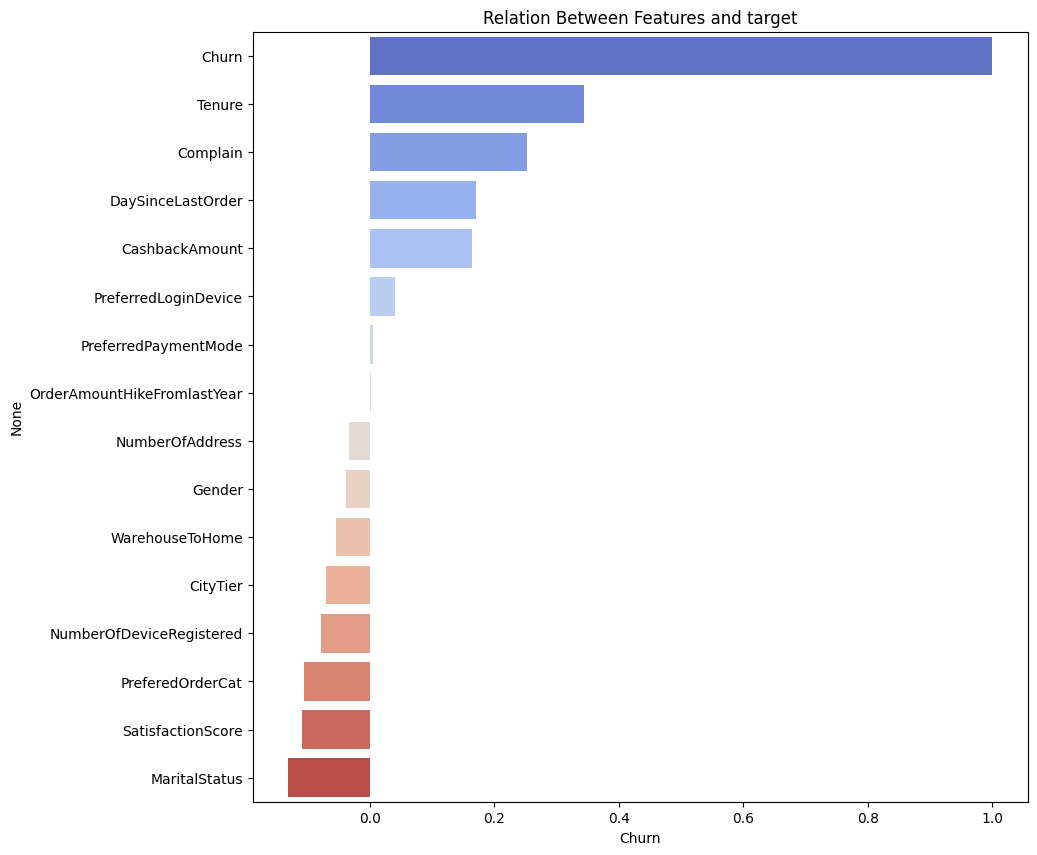

In [34]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')